## Imports/ Utils

In [16]:
import json
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
#Utils
def ler_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

def analisar_frequencia(lista_dicionarios, atributo):
    # Extrair as categorias
    lista_dados = [dicionario[atributo] for dicionario in lista_dicionarios]
    # Contar a frequência das categorias
    frequencia_atributo = Counter(lista_dados)
    return frequencia_atributo

# Modificar dados exibidos
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:1.1f}% \n ({v:d})'.format(p=pct,v=val)
    return my_autopct

def grafPie(itens,size,title='Distribuição BoatosBrCorpus: Real x Fake'):
    
    colors = ['#2173A6', '#A7C6D9', '#5697BF','#2168A6']
    explodeAux = [0 for i in range(len(itens)-1)]
    explodeAux.insert(0,0.2)
    explode = tuple(explodeAux)

    # Criar o gráfico de pizza
    plt.pie(size, explode=explode, labels=itens, colors=colors,
            autopct= make_autopct(size), shadow=True, startangle=90)

    plt.axis('equal')  # Garantir que o gráfico seja circular
    plt.title(title)

    plt.show()

## Analise

In [18]:
# Ler Base de dados
database = pd.read_json("../base_completa/boatos_br_corpus.json")

In [19]:
database.columns

Index(['url', 'data-publicacao', 'origem', 'categorias', 'texto',
       'texto-normalizado', 'rotulo'],
      dtype='object')

In [20]:
database.shape

(3298, 7)

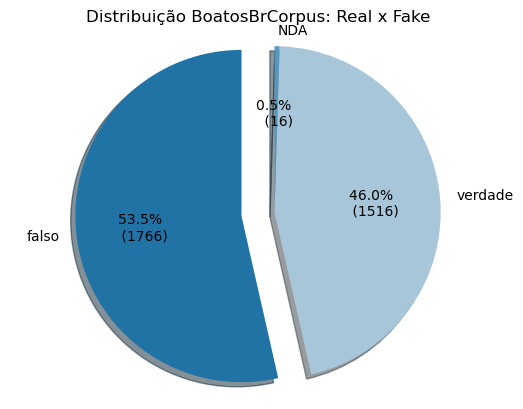

In [21]:
dados = database['rotulo'].value_counts()
grafPie(dados.index,dados.values)